In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.shape

(284807, 31)

In [4]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
#taking first 20000 samples
data_20000 = data[:20000]

In [7]:
data_20000.shape

(20000, 31)

In [8]:
data_20000["Class"].value_counts()

0    19915
1       85
Name: Class, dtype: int64

In [9]:
data20000 = data_20000.drop(['Class'], axis=1)
data20000.shape

(20000, 30)

In [10]:
data20000_labels = data_20000["Class"]
data20000_labels.shape

(20000,)

In [11]:
data20000_Std = StandardScaler().fit_transform(data20000)
print(data20000_Std.shape)
print(type(data20000_Std))

(20000, 30)
<class 'numpy.ndarray'>


In [12]:
X1 = data20000_Std[0:16000]
XTest = data20000_Std[16000:20000]
Y1 = data20000_labels[0:16000]
YTest = data20000_labels[16000:20000]
#taking last 4k points as test data and first 16k points as train data

myList = list(range(0,50))
neighbors = list(filter(lambda x: x%2!=0, myList))  #This will give a list of odd numbers only ranging from 0 to 50

CV_Scores = []

for k in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    scores = cross_val_score(KNN, X1, Y1, cv = 5, scoring='recall')
    CV_Scores.append(scores.mean())

In [13]:
CV_Scores

[0.741904761904762,
 0.5142857142857142,
 0.5142857142857143,
 0.5009523809523809,
 0.48761904761904756,
 0.5009523809523809,
 0.48571428571428577,
 0.4990476190476191,
 0.5123809523809524,
 0.46952380952380957,
 0.46952380952380957,
 0.42666666666666664,
 0.6,
 0.5571428571428572,
 0.5142857142857142,
 0.45714285714285713,
 0.41428571428571426,
 0.41428571428571426,
 0.4,
 0.38666666666666666,
 0.38666666666666666,
 0.42857142857142866,
 0.5085714285714286,
 0.5085714285714286,
 0.5085714285714286]

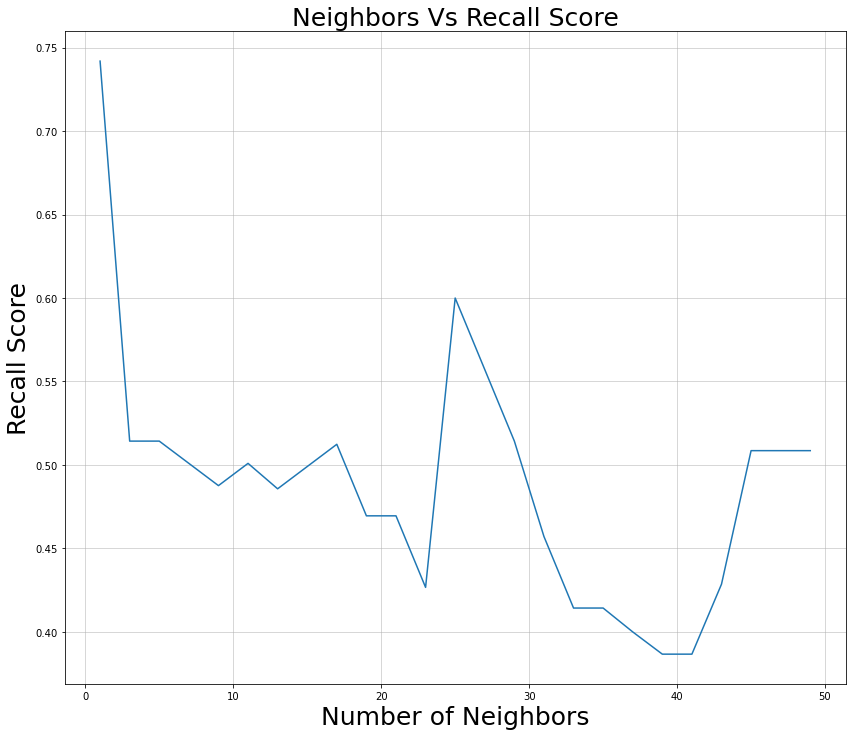

In [14]:
plt.figure(figsize = (14, 12))
plt.plot(neighbors, CV_Scores)
plt.title("Neighbors Vs Recall Score", fontsize=25)
plt.xlabel("Number of Neighbors", fontsize=25)
plt.ylabel("Recall Score", fontsize=25)
plt.grid(linestyle='-', linewidth=0.5)

In [15]:
best_k = neighbors[CV_Scores.index(max(CV_Scores))]
best_k

1

**Best 'K' value is chosen as 1**

In [16]:
from sklearn.metrics import recall_score

KNN_best = KNeighborsClassifier(n_neighbors = best_k, algorithm = 'kd_tree')

KNN_best.fit(X1, Y1)

prediction = KNN_best.predict(XTest)

recallTest = recall_score(YTest, prediction)

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

cm = confusion_matrix(YTest, prediction)

print(cm)

tn, fp, fn, tp = cm.ravel()

(tn, fp, fn, tp)

Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334
[[3978   10]
 [   2   10]]


(3978, 10, 2, 10)

In [17]:
YTest.value_counts()

0    3988
1      12
Name: Class, dtype: int64

In [18]:
# Calculating R square value of our model
from sklearn.metrics import r2_score

print("Recall Score of the knn classifier for best k values of "+str(best_k)+" is: "+str(recallTest))

Recall Score of the knn classifier for best k values of 1 is: 0.8333333333333334
